# Visualization of the min-max objective for boosted stumps

In [139]:
import os
os.chdir("../")
import numpy as np
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline
seaborn.set(font_scale=1.65)
seaborn.set_style("white")


4.006387148158443 7.12971950976526 13.500045533658492


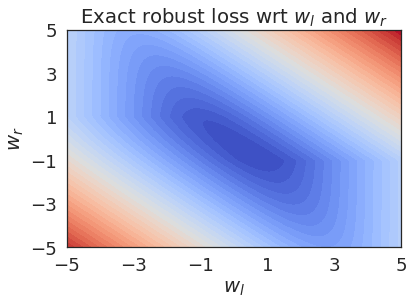

In [168]:
def f(w_l, w_r):
    """
    Note: the values that we select for y, G_k_sum, h_r, h_l are arbitrary. 
    This plot aims to show the qualitative behaviour of the objective that we optimize.
    """
    y = np.array([-1, 1, 1, -1, 1])
    # This is the joint contribution of the previous weak learners
    G_k_sum_y_wl = np.array([4.5, -1.0, 2.0, -0.5, 3.0])
    h_r = np.array([2.0, -2.0, 5.0, -3.0, -1.0])
    h_l = np.array([5.0, -1.0, -3.5, -2.0, -4.0])  
    # If some coordinate didn't have a split yet, then h_l=h_r=0.
    # Then the problem simplifies to just 2 case distinctions.  
    # h_r = np.zeros(5)
    # h_l = np.zeros(5)

    margin = G_k_sum_y_wl + y*w_l + np.minimum(h_l, h_r + y*w_r)
    losses = np.exp(-margin)
    obj = np.sum(losses)
    # for better visualization, we rather plot log objective
    log_obj = np.log(obj)
    return log_obj

np.random.seed(1)
plot_name = 'minmax_objective_stumps'

grid_size = 200
min_val, max_val = -5, 5
XX, YY = np.meshgrid(np.linspace(min_val, max_val, grid_size), 
                     np.linspace(min_val, max_val, grid_size))
X0 = np.stack([np.ravel(XX), np.ravel(YY)]).T
f_vals = np.zeros(X0.shape[0])
for i in range(len(f_vals)):
    f_vals[i] = f(X0[i, 0], X0[i, 1])
ZZ = f_vals.reshape(grid_size, grid_size)

print(f_vals.min(), f_vals.mean(), f_vals.max())

ax = plt.gca()
plt.contourf(XX,YY,ZZ, cmap="coolwarm", 
             levels=np.linspace(f_vals.min(), f_vals.max(), 40))
axis_margin = 0.0
ax.set_xlim([min_val-axis_margin, max_val+axis_margin])
ax.set_ylim([min_val-axis_margin, max_val+axis_margin])

ticks = [-5, -3, -1, 1, 3, 5]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xlabel('$w_l$')
ax.set_ylabel('$w_r$')
ax.set_title('Exact robust loss wrt $w_l$ and $w_r$')#, fontsize=15)
    
plt.savefig('plots/{}.pdf'.format(plot_name), bbox_inches='tight')


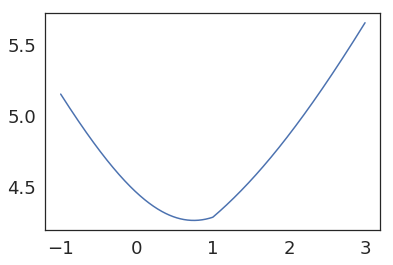

In [164]:
# Plot just wrt w_r. Not so evident.
w_r_vals = np.linspace(-1, 3, 500)
f_vals = np.zeros(w_r_vals.shape[0])
for i in range(len(w_r_vals)):
    f_vals[i] = f(-1.0, w_r_vals[i])
plt.plot(w_r_vals, f_vals)
